# Data import

In [ ]:
import pandas as pd

In [ ]:
df_train=pd.read_csv('train_data.txt',sep=":::",names=['Title','Genre','Description'],engine='python')

In [ ]:
df_train.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
df_test=pd.read_csv('test_data.txt',sep=":::",names=['id', 'title', 'description'],engine='python')

In [ ]:
df_test.head()

,id,title,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
df_train.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
df_train.isnull().sum()

,0
Title,0
Genre,0
Description,0


In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train['Genre'].value_counts()

,count
Genre,
drama,13613
documentary,13096
comedy,7447
short,5073
horror,2204
thriller,1591
action,1315
western,1032
reality-tv,884


In [ ]:
import matplotlib.pyplot as plt

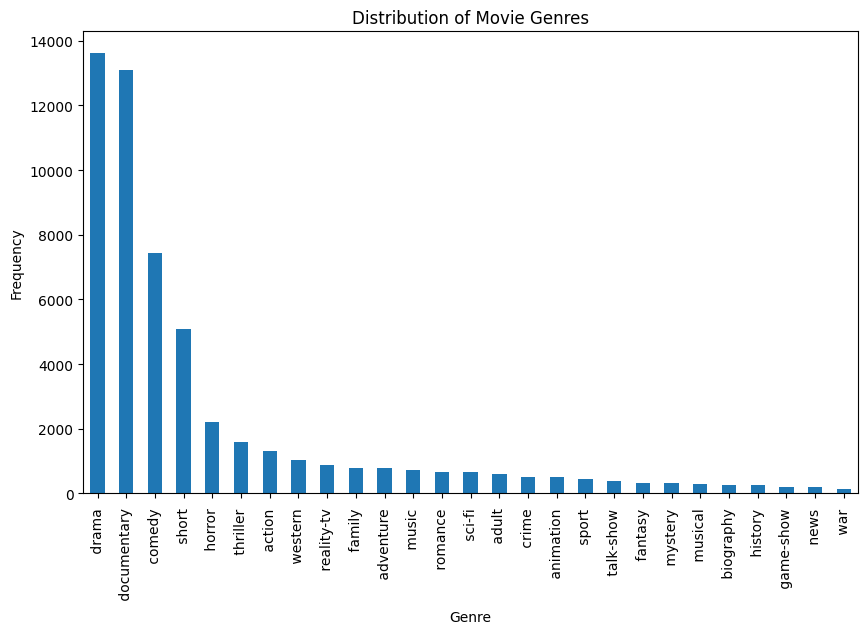

In [ ]:
plt.figure(figsize=(10, 6))
df_train['Genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
_ = plt.ylabel('Frequency')


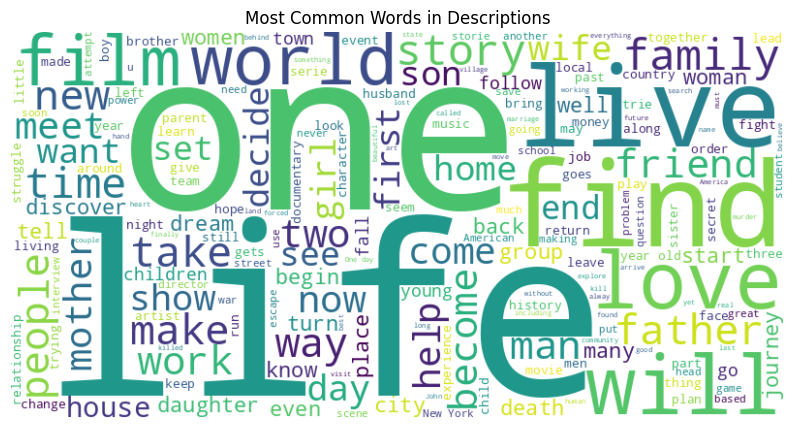

In [ ]:
# Most common words in descriptions (word cloud)
from wordcloud import WordCloud
text = ' '.join(df_train['Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Descriptions')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Download the required 'punkt_tab' resource
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
stemmer = PorterStemmer()

In [ ]:
def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [ ]:
# Example usage with your DataFrame
df_train['Stemmed_Description'] = df_train['Description'].apply(stem_text)
df_test['Stemmed_description'] = df_test['description'].apply(stem_text)

In [ ]:
df_train[['Description', 'Stemmed_Description']].head()

,Description,Stemmed_Description
1,Listening in to a conversation between his do...,listen in to a convers between hi doctor and p...
2,A brother and sister with a past incestuous r...,a brother and sister with a past incestu relat...
3,As the bus empties the students for their fie...,as the bu empti the student for their field tr...
4,To help their unemployed father make ends mee...,"to help their unemploy father make end meet , ..."
5,The film's title refers not only to the un-re...,the film 's titl refer not onli to the un-reco...


In [ ]:
df_test[['description', 'Stemmed_description']].head()

,description,Stemmed_description
0,"L.R. Brane loves his life - his car, his apar...","l.r . brane love hi life - hi car , hi apart ,..."
1,"Spain, March 1964: Quico is a very naughty ch...","spain , march 1964 : quico is a veri naughti c..."
2,One year in the life of Albin and his family ...,one year in the life of albin and hi famili of...
3,"His father has died, he hasn't spoken with hi...","hi father ha die , he ha n't spoken with hi br..."
4,Before he was known internationally as a mart...,befor he wa known intern as a martial art supe...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Feature extraction
X = df_train['Stemmed_Description']  # Using DESCRIPTION as the input feature
y = df_train['Genre']         # Target variable

In [ ]:
# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test_tfidf)

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5918103845799133
Classification Report:
                precision    recall  f1-score   support

      action        0.55      0.30      0.39       263
       adult        0.85      0.25      0.39       112
   adventure        0.39      0.14      0.20       139
   animation        0.59      0.12      0.21       104
   biography        0.00      0.00      0.00        61
      comedy        0.52      0.60      0.56      1443
       crime        0.25      0.02      0.03       107
 documentary        0.68      0.85      0.76      2659
       drama        0.55      0.78      0.65      2697
      family        0.48      0.10      0.17       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.94      0.42      0.59        40
     history        0.00      0.00      0.00        45
      horror        0.66      0.59      0.62       431
       music        0.63      0.51      0.56       144
     musical        0.00      0.00      0.00        50
     myster

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Save the TF-IDF vectorizer and model (optional)
import joblib
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(model, 'genre_classification_model.pkl')

['genre_classification_model.pkl']